mit grep gefilterte Datei verwenden, sonst funktioniert das filtern mit sort und uniq nicht, da die authfilenumer Einträge teilweise fehlerhaft sind. Alle fehlerhaften werden rausgeschmissen, da das Problem in Adis liegt und hier nicht behoben werden kann. 

In [1]:
import pandas as pd
import seaborn as sns
# import numpy as np
# import matplotlib.pyplot as plt
sns.set()
# %matplotlib inline

df_cleangnd = pd.read_csv("cleangnd_uniqloopallfields.csv", low_memory=False)
u_df_all = pd.read_csv("u_df_all.csv")


In [2]:
pwd

'/home_ext/PK/b-kj102/Dokumente/ZBIW_datalib_Projekt_Kalliope/data_loop_allfields'

In [3]:
df_cleangnd

,persname.authfilenumber,persname.content,persname.encodinganalog,persname.normal,persname.role,persname.source
0,000188328,Universität Hamburg / Germanisches Seminar,DE-611-PS-30181216,Universität Hamburg / Germanisches Seminar,Adressat,GND
1,0011647811X,"Endrulat, Bernhard",DE-611-PS-30160604,"Endrulat, Bernhard",Adressat,GND
2,0011647811X,"Endrulat, Bernhard",DE-611-PS-30160604,"Endrulat, Bernhard",Verfasser,GND
3,00328524,"Schönemann, Toni (1872-1941)",DE-611-PS-328524,"Schönemann, Toni",Verfasser,GND
4,00350491,"Kurnoth, Waldemar (1880-1962)",DE-611-PS-350491,"Kurnoth, Waldemar",Verfasser,GND
...,...,...,...,...,...,...
817623,98149482X,"Vorderegger, Roger",DE-611-PS-30147384,"Vorderegger, Roger",Verfasser,GND
817624,991305973,Johann Friedrich Gleditsch <Leipzig>,NaN,Johann Friedrich Gleditsch <Leipzig>,Genannte Körperschaft,GND
817625,996017402,Hinz & Kunst (Hamburg),DE-611-PS-30173633,Hinz & Kunst (Hamburg),Adressat,GND
817626,999235982,Arnoldische Buchhandlung <Dresden>,NaN,Arnoldische Buchhandlung <Dresden>,Adressat,GND


In [4]:
u_df_all

,persname.authfilenumber,persname.content,persname.encodinganalog,persname.normal,persname.role,persname.source
0,0011647811X,"Endrulat, Bernhard",DE-611-PS-30160604,"Endrulat, Bernhard",Verfasser,GND
1,00328524,"Schönemann, Toni (1872-1941)",DE-611-PS-328524,"Schönemann, Toni",Verfasser,GND
2,00350491,"Kurnoth, Waldemar (1880-1962)",DE-611-PS-350491,"Kurnoth, Waldemar",Verfasser,GND
3,00671366,"Mitscherlich, Alexander",DE-611-PS-30145709,"Mitscherlich, Alexander",Verfasser,GND
4,015098230,"Igler, André",NaN,"Igler, André",Verfasser,GND
...,...,...,...,...,...,...
476231,400141299,"Maximilian (Römisch-Deutsches Reich, Kaiser, I.)",DE-611-PS-909797,"Maximilian (Römisch-Deutsches Reich, Kaiser, I.)",Behandelt,GND
476232,571680178,"Aellen, Hermann (1887-1939)",NaN,"Aellen, Hermann",Behandelt,GND
476233,577643304,"Cassou, Jean (1897-1986)",NaN,"Cassou, Jean",Behandelt,GND
476234,67820551,"Porret, Eugene (-1987)",DE-611-PS-30154032,"Porret, Eugene",Behandelt,GND


In [5]:
dftst = df_cleangnd["persname.role"].value_counts().nlargest(n=15).rename_axis('role').reset_index(name='counts')
dftst

,role,counts
0,Verfasser,345362
1,Adressat,137529
2,Korrespondenzpartner,49167
3,Behandelt,47582
4,Erwähnt,35508
5,Dokumentiert,31130
6,Bestandsbildner,23365
7,Erwähnte Person,23349
8,Schreiber,12658
9,Behandelte Person,8639


In [6]:
u_df_all["persname.normal"].value_counts()

Müller, Georg        42
Müller, Wilhelm      41
Müller, Johannes     35
Müller, Friedrich    34
Müller, Karl         33
                     ..
Shou, Peryt           1
Gödeke, Heinrich      1
Stucki, Guido         1
Ulm, Fritz Otto       1
Porret, Eugene        1
Name: persname.normal, Length: 305583, dtype: int64

In [7]:
u_df_all["persname.normal"].value_counts().nlargest(n=40)

Müller, Georg           42
Müller, Wilhelm         41
Müller, Johannes        35
Müller, Friedrich       34
Müller, Karl            33
Schmidt, Karl           33
Meyer, Heinrich         29
Meyer, Ernst            29
Richter, Hans           28
Schmidt, Hermann        27
Müller, Hermann         27
Müller, Ernst           26
Müller, Heinrich        25
Weber, Heinrich         25
Schmidt, Wilhelm        25
Wagner, Richard         24
Bauer, Wilhelm          24
Müller, Hans            24
Schmidt, Adolf          24
Hoffmann, Friedrich     23
Fischer, Georg          23
Unbekannt               23
Schmidt, Gerhard        22
Weber, Wilhelm          22
Fischer, Hermann        22
Meyer, Hans             21
Fischer, Otto           21
Fischer, Hans           21
Müller, Gerhard         21
Müller, Otto            21
Schmidt, Friedrich      20
Mayer, Karl             20
Müller, Max             20
Johannes                20
Müller, Wolfgang        20
Meyer, Wilhelm          20
Schneider, Franz        20
S

In [14]:
names = u_df_all["persname.normal"].value_counts().nlargest(n=40)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

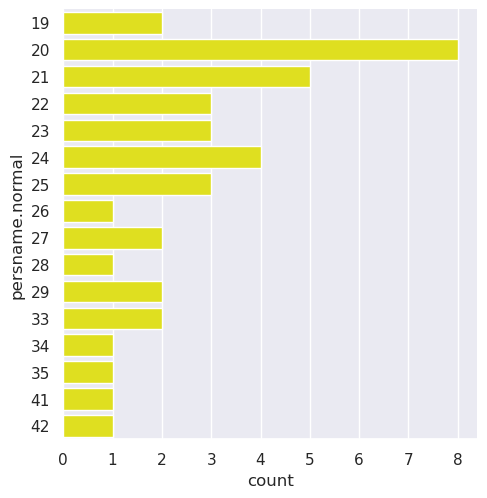

In [15]:
sns.catplot(y=names,
            data=u_df_all, kind='count', color="yellow")

<AxesSubplot:xlabel='persname.normal', ylabel='Count'>

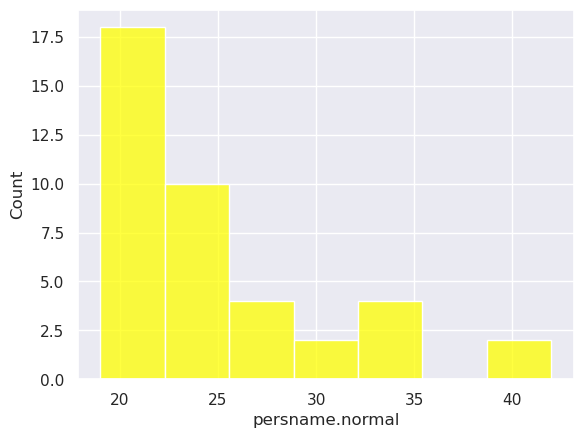

In [17]:
sns.histplot(names, color="yellow")

In [9]:
#sns.catplot(x="persname.normal", y="persname:role", data=u_df_all, kind='count', aspect = 4)

data = u_df_all["persname.role"].value_counts()
x = 'persname.role'
sns.catplot(x='Year Patron Registered', kind='count', data=registered_per_year,  aspect=3,)
sns.catplot(x='persname.role', kind = 'count', data = data, aspect=3)

<AxesSubplot:xlabel='persname.normal', ylabel='Count'>

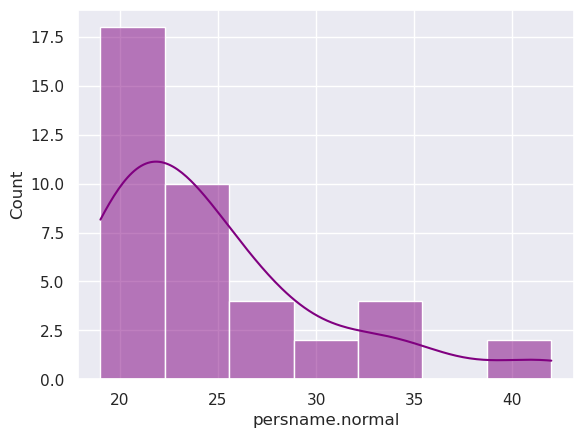

In [42]:
sns.histplot(data=u_df_all, x=names, kde=True, color='purple')

<AxesSubplot:xlabel='persname.authfilenumber', ylabel='Count'>

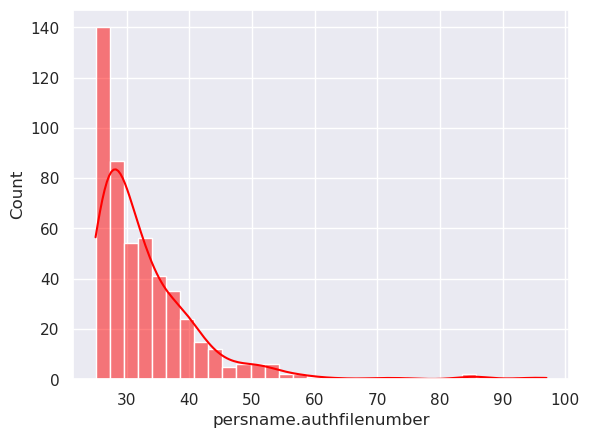

In [39]:
# sns.catplot(x='Year Patron ', kind='count', data=registered_per_year,  aspect=3,)
# sns.histplot(df['Total Checkouts'], kde=False)
sns.histplot(df_cleangnd["persname.authfilenumber"].value_counts().nlargest(n=500), kde = True, color = 'red')

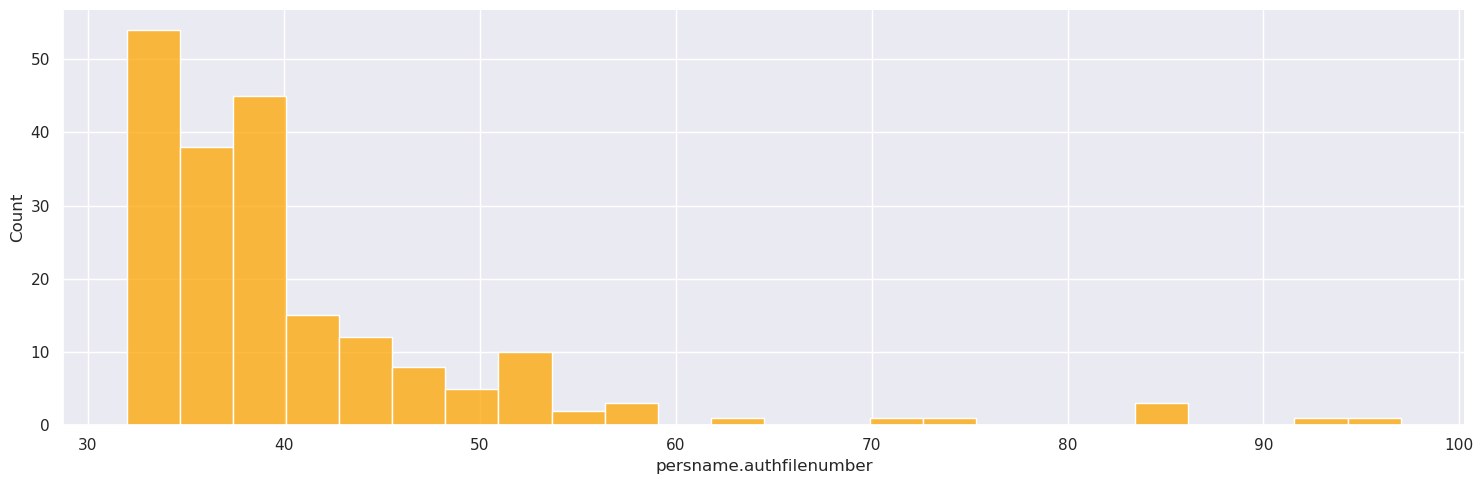

In [34]:
sns.displot(df_cleangnd["persname.authfilenumber"].value_counts().nlargest(n=200), kde = False, color = 'orange', aspect=3)

Wie kann ich mit catplot anzeigen, wieviel GND-Ids es pro Rolle gibt (die Rollen limitiert mit nlargest)?

In [12]:
datax = df_cleangnd["persname.role"]

In [65]:
data_more = df_cleangnd["persname.role"].value_counts().nlargest(n=5)

In [66]:
data_gnd = df_cleangnd["persname.authfilenumber"].value_counts().nlargest(n=5)


In [63]:
more_data_gnd = df_cleangnd["persname.authfilenumber"].value_counts().nlargest(n=200)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

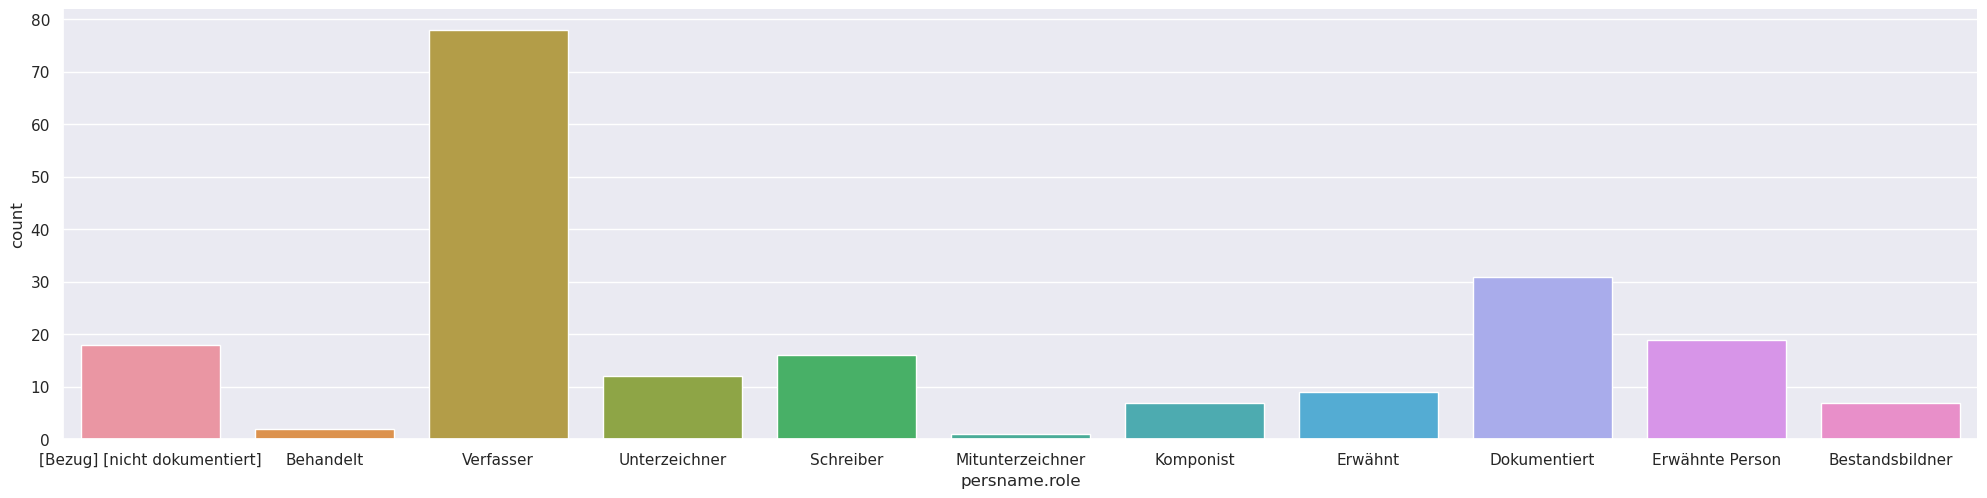

In [64]:
sns.catplot(x=more_data_gnd, data=datax, kind='count', aspect = 4) #data = data_gnd,

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

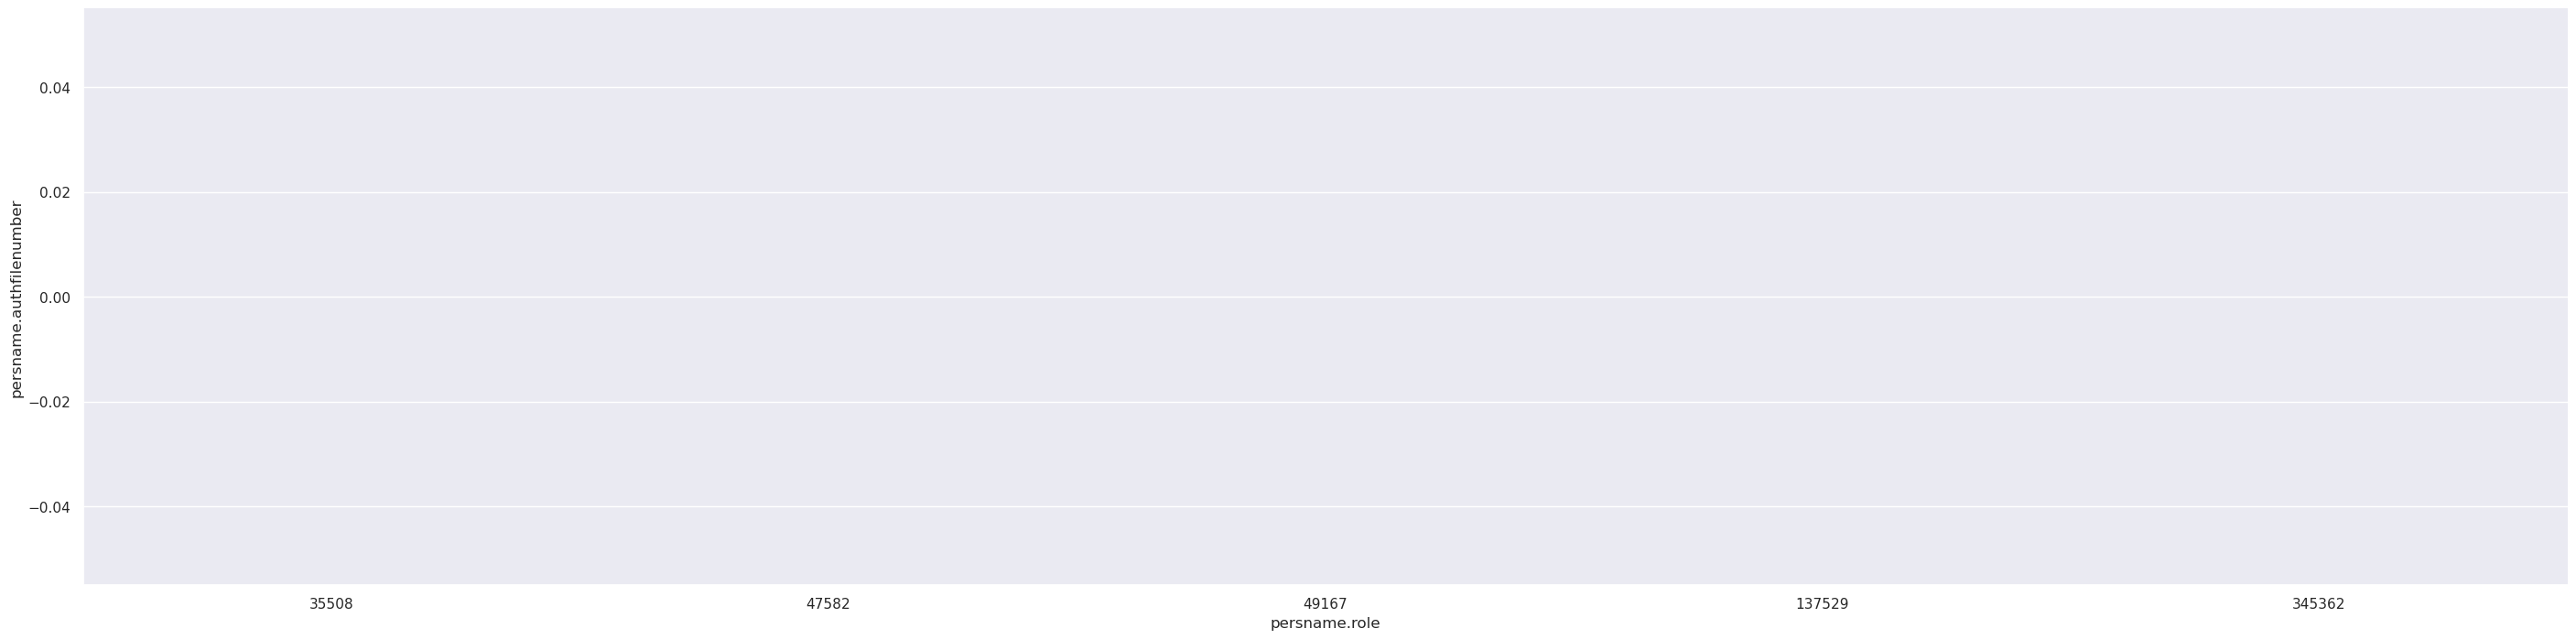

In [67]:
#sns.catplot(
 #   data=df, x="class", y="survived", col="sex",
  #  kind="bar", height=4, aspect=.6,
sns.catplot(data=df_cleangnd, x=data_more, y=data_gnd, height=7, aspect=4)